# Pulizia dei Dati
In questa sezione, caricheremo il dataset e lo puliremo per prepararlo all'analisi.

In [58]:
import pandas as pd
import numpy as np
# Carica il dataset
df = pd.read_csv('ai_vs_human_dataset_medium.csv')

# Visualizza le prime righe del dataframe
df.head()

,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes
0,305,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,author_50,2023-12-19 11:21:46,0.045,personal_tone
1,341,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,2024-04-01 17:43:26,0.007,NaN
2,48,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,2025-08-28 07:56:09,0.163,personal_tone
3,68,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,2023-10-23 14:34:48,0.122,NaN
4,480,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,2024-11-28 11:31:37,0.105,NaN


In [59]:
# Controlla i valori mancanti
df.isnull().sum()

id                    0
label                 0
topic                 0
text                  0
length_chars          0
length_words          0
quality_score         0
sentiment             0
source_detail         0
timestamp             0
plagiarism_score      0
notes               343
dtype: int64

In [60]:
# Visualizza le informazioni sul dataframe pulito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             157 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [61]:
# Rimuovi i duplicati
df.drop_duplicates(inplace=True)
print(f"Numero di righe dopo la rimozione dei duplicati: {len(df)}")

Numero di righe dopo la rimozione dei duplicati: 500


In [62]:
# Visualizza le informazioni sul dataframe dopo la rimozione dei duplicati
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             157 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [63]:
# gestisci i valori mancanti nella colonna notes
df['notes'] = df['notes'].fillna('Nessuna nota')

In [64]:
# Visualizza le informazioni sul dataframe dopo la gestione dei valori mancanti
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    int64  
 1   label             500 non-null    object 
 2   topic             500 non-null    object 
 3   text              500 non-null    object 
 4   length_chars      500 non-null    int64  
 5   length_words      500 non-null    int64  
 6   quality_score     500 non-null    float64
 7   sentiment         500 non-null    float64
 8   source_detail     500 non-null    object 
 9   timestamp         500 non-null    object 
 10  plagiarism_score  500 non-null    float64
 11  notes             500 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [65]:
""" # Rimozione outlier per 'length_chars'
print(f"Numero di righe prima della rimozione degli outlier: {len(df)}")
Q1_chars = df['length_chars'].quantile(0.25)
Q3_chars = df['length_chars'].quantile(0.75)
IQR_chars = Q3_chars - Q1_chars
lower_bound_chars = Q1_chars - 1.5 * IQR_chars
upper_bound_chars = Q3_chars + 1.5 * IQR_chars
df = df[(df['length_chars'] >= lower_bound_chars) & (df['length_chars'] <= upper_bound_chars)]
print(f"Numero di righe dopo la rimozione degli outlier da 'length_chars': {len(df)}")

# Rimozione outlier per 'length_words'
Q1_words = df['length_words'].quantile(0.25)
Q3_words = df['length_words'].quantile(0.75)
IQR_words = Q3_words - Q1_words
lower_bound_words = Q1_words - 1.5 * IQR_words
upper_bound_words = Q3_words + 1.5 * IQR_words
df = df[(df['length_words'] >= lower_bound_words) & (df['length_words'] <= upper_bound_words)]
print(f"Numero di righe dopo la rimozione degli outlier da 'length_words': {len(df)}") """


' # Rimozione outlier per \'length_chars\'\nprint(f"Numero di righe prima della rimozione degli outlier: {len(df)}")\nQ1_chars = df[\'length_chars\'].quantile(0.25)\nQ3_chars = df[\'length_chars\'].quantile(0.75)\nIQR_chars = Q3_chars - Q1_chars\nlower_bound_chars = Q1_chars - 1.5 * IQR_chars\nupper_bound_chars = Q3_chars + 1.5 * IQR_chars\ndf = df[(df[\'length_chars\'] >= lower_bound_chars) & (df[\'length_chars\'] <= upper_bound_chars)]\nprint(f"Numero di righe dopo la rimozione degli outlier da \'length_chars\': {len(df)}")\n\n# Rimozione outlier per \'length_words\'\nQ1_words = df[\'length_words\'].quantile(0.25)\nQ3_words = df[\'length_words\'].quantile(0.75)\nIQR_words = Q3_words - Q1_words\nlower_bound_words = Q1_words - 1.5 * IQR_words\nupper_bound_words = Q3_words + 1.5 * IQR_words\ndf = df[(df[\'length_words\'] >= lower_bound_words) & (df[\'length_words\'] <= upper_bound_words)]\nprint(f"Numero di righe dopo la rimozione degli outlier da \'length_words\': {len(df)}") '

# Analisi Esplorativa dei Dati (EDA)
In questa sezione, esploreremo i dati per capire meglio le loro caratteristiche.

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


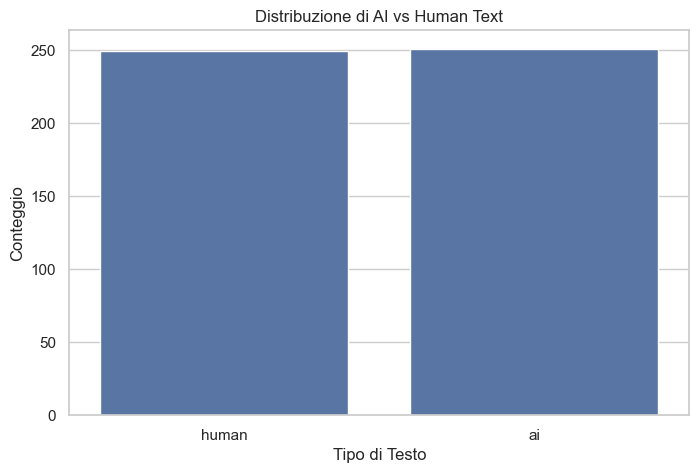

In [67]:
# Visualizza la distribuzione della colonna 'label'
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribuzione di AI vs Human Text')
plt.xlabel('Tipo di Testo')
plt.ylabel('Conteggio')
plt.show()

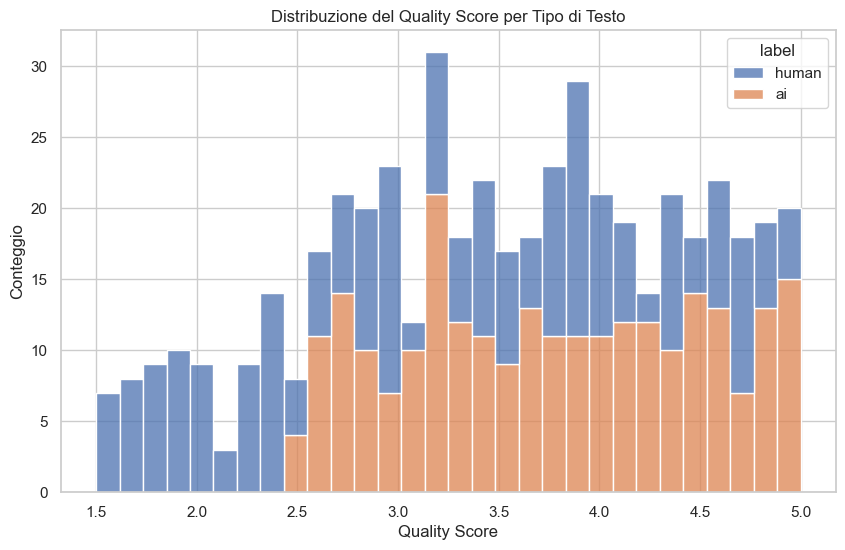

In [68]:
# Visualizza la distribuzione del quality_score per ogni label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='quality_score', hue='label', multiple='stack', bins=30)
plt.title('Distribuzione del Quality Score per Tipo di Testo')
plt.xlabel('Quality Score')
plt.ylabel('Conteggio')
plt.show()

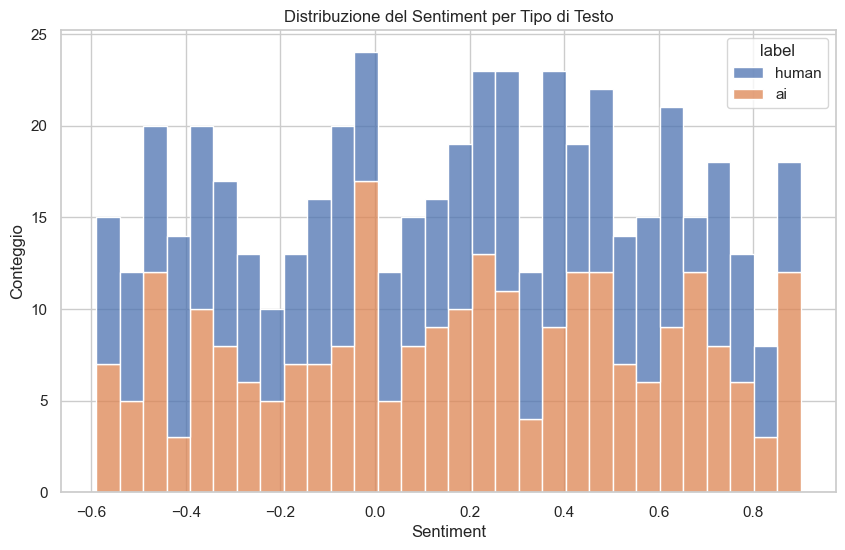

In [69]:
# Visualizza la distribuzione del sentiment per ogni label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sentiment', hue='label', multiple='stack', bins=30)
plt.title('Distribuzione del Sentiment per Tipo di Testo')
plt.xlabel('Sentiment')
plt.ylabel('Conteggio')
plt.show()

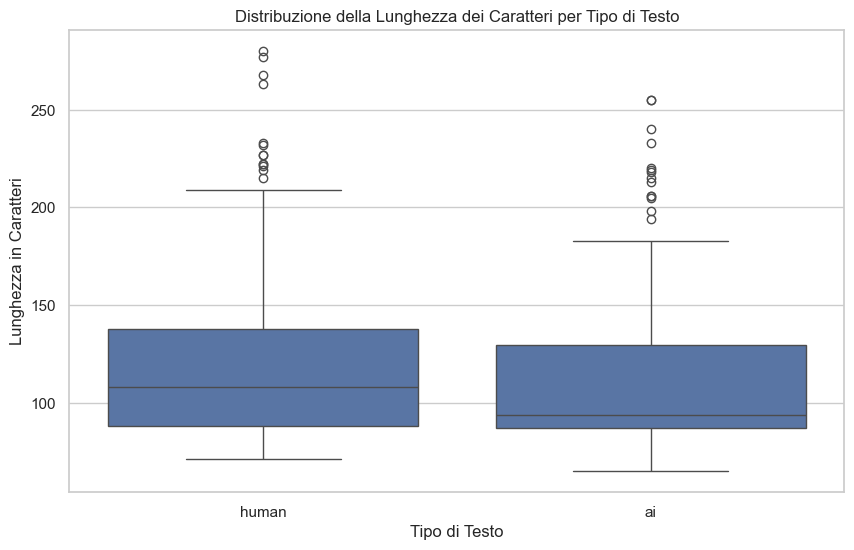

In [70]:
# Boxplot per 'length_chars' vs 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length_chars', data=df)
plt.title('Distribuzione della Lunghezza dei Caratteri per Tipo di Testo')
plt.xlabel('Tipo di Testo')
plt.ylabel('Lunghezza in Caratteri')
plt.show()

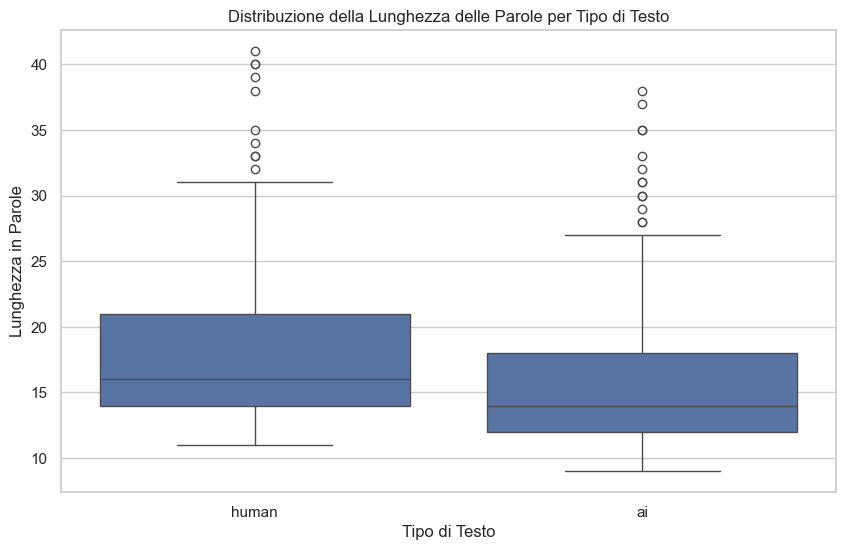

In [71]:
# Boxplot per 'length_words' vs 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length_words', data=df)
plt.title('Distribuzione della Lunghezza delle Parole per Tipo di Testo')
plt.xlabel('Tipo di Testo')
plt.ylabel('Lunghezza in Parole')
plt.show()

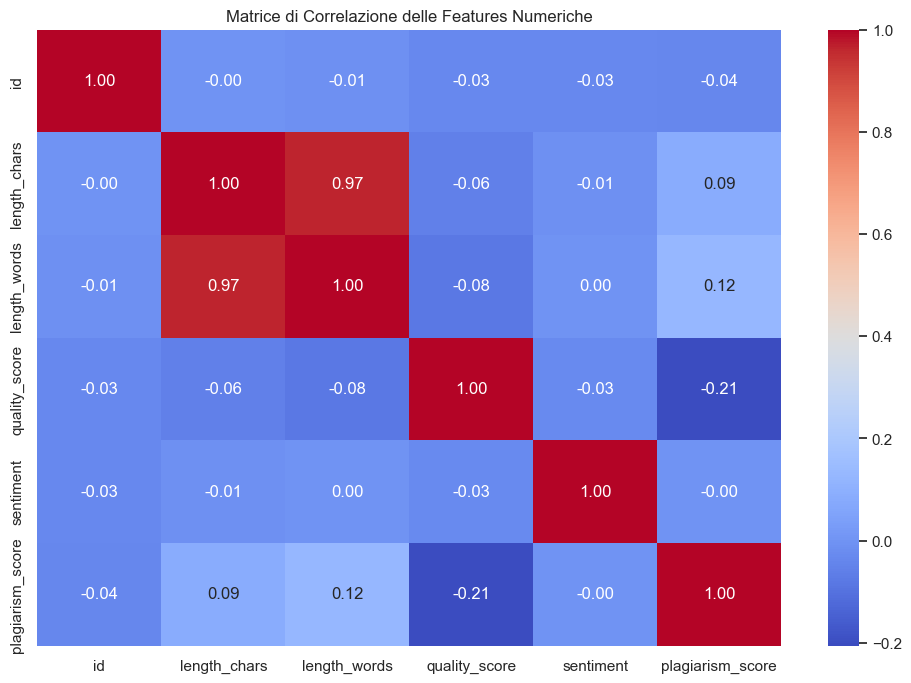

In [72]:
# Correlazione tra le features numeriche
numerical_features = df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione delle Features Numeriche')
plt.show()

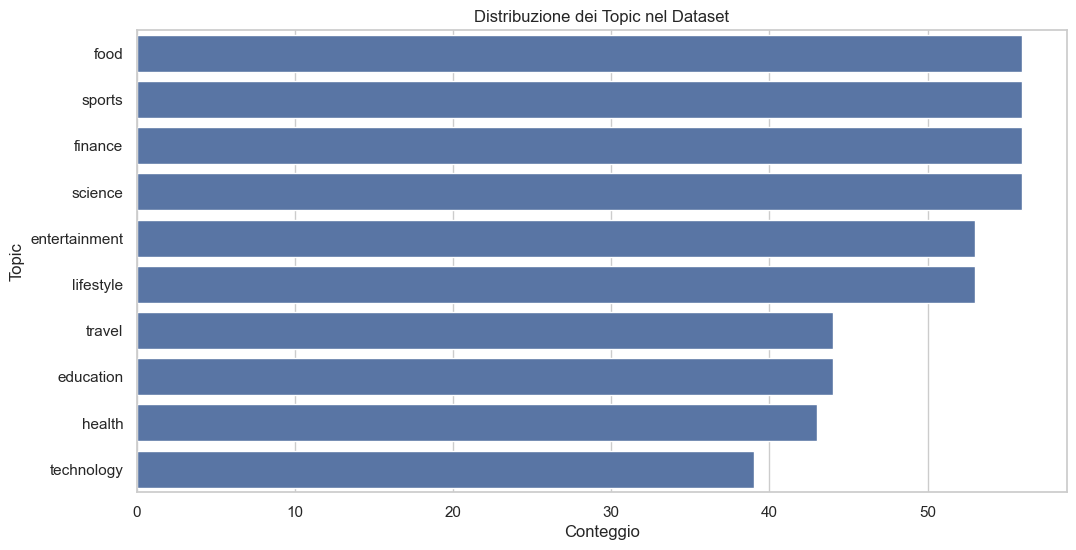

In [73]:
# Visualizza la distribuzione dei topic
plt.figure(figsize=(12, 6))
sns.countplot(y='topic', data=df, order = df['topic'].value_counts().index)
plt.title('Distribuzione dei Topic nel Dataset')
plt.xlabel('Conteggio')
plt.ylabel('Topic')
plt.show()

In [74]:
""" from wordcloud import WordCloud

# Word cloud per testi scritti da umani
human_text = ' '.join(df[df['label'] == 'human']['text'])
wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud per Testi Umani')
plt.show()

# Word cloud per testi generati da AI
ai_text = ' '.join(df[df['label'] == 'ai']['text'])
wordcloud_ai = WordCloud(width=800, height=400, background_color='black').generate(ai_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud per Testi AI')
plt.show() """

" from wordcloud import WordCloud\n\n# Word cloud per testi scritti da umani\nhuman_text = ' '.join(df[df['label'] == 'human']['text'])\nwordcloud_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)\n\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud_human, interpolation='bilinear')\nplt.axis('off')\nplt.title('Word Cloud per Testi Umani')\nplt.show()\n\n# Word cloud per testi generati da AI\nai_text = ' '.join(df[df['label'] == 'ai']['text'])\nwordcloud_ai = WordCloud(width=800, height=400, background_color='black').generate(ai_text)\n\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud_ai, interpolation='bilinear')\nplt.axis('off')\nplt.title('Word Cloud per Testi AI')\nplt.show() "

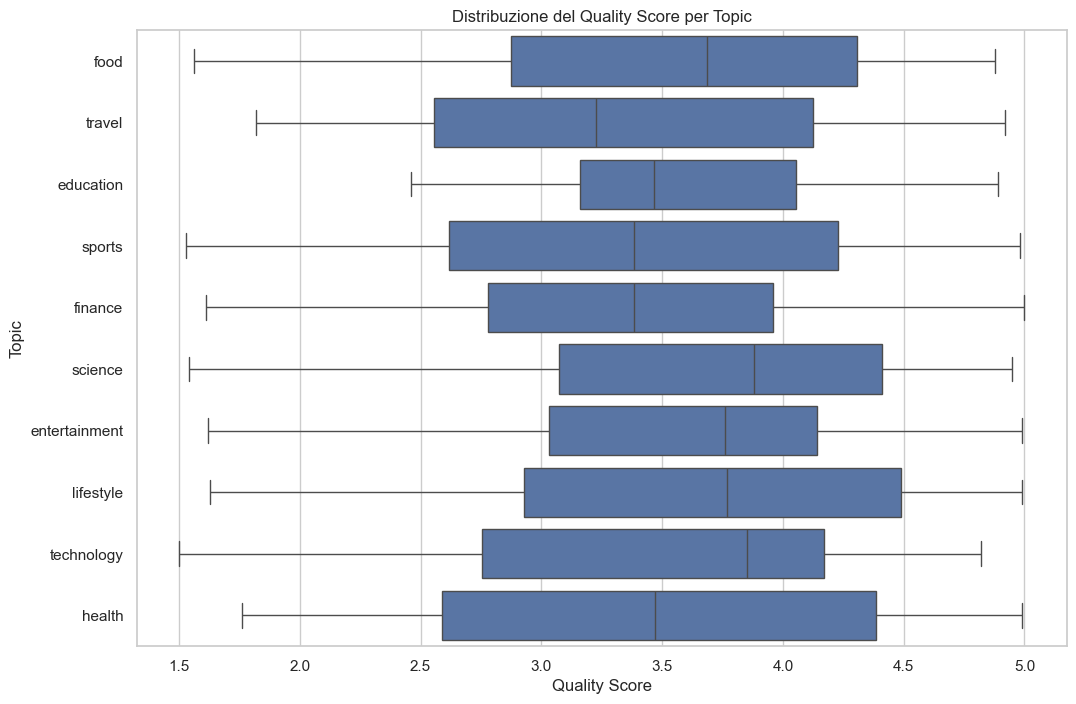

In [75]:
# Boxplot per 'quality_score' vs 'topic'
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality_score', y='topic', data=df)
plt.title('Distribuzione del Quality Score per Topic')
plt.xlabel('Quality Score')
plt.ylabel('Topic')
plt.show()

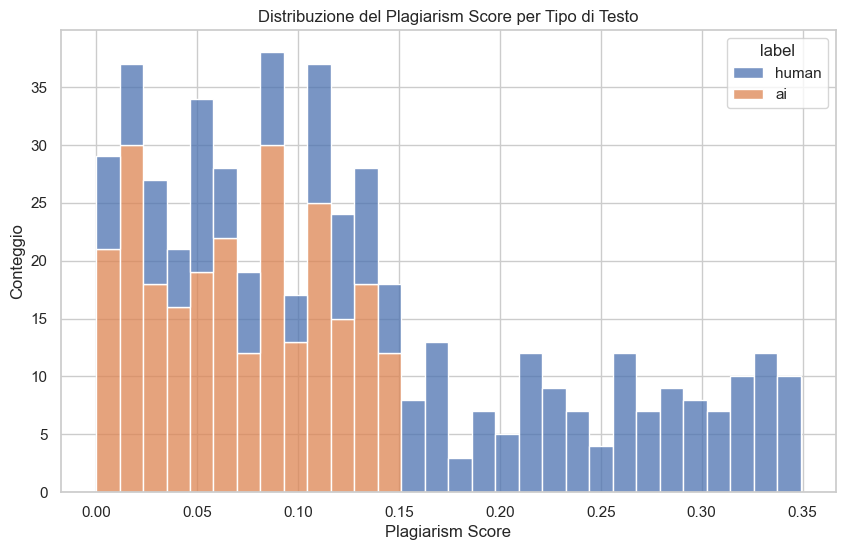

In [76]:
# Distribuzione del plagiarism_score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='plagiarism_score', hue='label', multiple='stack', bins=30)
plt.title('Distribuzione del Plagiarism Score per Tipo di Testo')
plt.xlabel('Plagiarism Score')
plt.ylabel('Conteggio')
plt.show()